<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/exoplanet_HR8799.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exoplanet HR8799**

[HR 8799 ](https://de.m.wikipedia.org/wiki/HR_8799) is a 30 million-year-old main-sequence star located 133.3 light-years (40.9 parsecs) away from Earth in the constellation of Pegasus

Paper: [Direct emission spectroscopy of exoplanets with the medium
resolution imaging spectrometer on board JWST MIRI](https://www.aanda.org/articles/aa/pdf/2022/02/aa41663-21.pdf)

In [ ]:
!pip install lightkurve astroquery astropy -q
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from astroquery.vizier import Vizier
from astropy.coordinates import Angle

**Search for data**

In [ ]:
# Choose exoplanet system with star
# target = 'Trappist-1'
# target = 'Kepler-10'
# target = 'Kepler-8'
target = 'HR8799'

In [ ]:
# Search for all missions for target exoplanet system (TPF raw data)
pixelfile_info = lk.search_targetpixelfile(target)
pixelfile_info

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 56,2022,SPOC,20,245368902,0.0
1,TESS Sector 56,2022,SPOC,120,245368902,0.0
2,TESS Sector 56,2022,TESS-SPOC,200,245368902,0.0


In [ ]:
# Search for specific missions for target exoplanet system (preprocessed Lightcurve data)
search = lk.search_lightcurve(target, mission="TESS")
print(search)

SearchResult containing 4 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 56 2022      SPOC      20   245368902      0.0
  1 TESS Sector 56 2022      SPOC     120   245368902      0.0
  2 TESS Sector 56 2022 TESS-SPOC     200   245368902      0.0
  3 TESS Sector 56 2022       QLP     200   245368902      0.0


In [ ]:
# Search for specific missions for target exoplanet system (preprocessed Lightcurve data)
search = lk.search_lightcurve(target, mission="K2")
print(search)

No data found for target "HR8799".
ERROR:lightkurve.search:No data found for target "HR8799".


SearchResult containing 0 data products.


In [ ]:
# Search for specific missions for target exoplanet system (preprocessed Lightcurve data)
search = lk.search_lightcurve(target, mission="Kepler")
print(search)

No data found for target "HR8799".
ERROR:lightkurve.search:No data found for target "HR8799".


SearchResult containing 0 data products.


**Load raw and preprocessed data**

In [ ]:
# Load lightcurve proprocessed data for target exoplanet system
lightcurve_tess = lk.search_lightcurve(target, mission="TESS").download(quality_bitmask="default")
lightcurve_tess

/usr/local/lib/python3.10/dist-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
2825.262011306921,8.7040869e+05,2.2333176e+02,5.0300439e-03,6902508,1491.35035,1245.82875,8.4788919e+05,2.1480896e+02,3.5177380e+03,1.9034935e+01,8.7040869e+05,2.2333176e+02,0,———,———,———,———,1491.35035,2.3082549e-04,1245.82875,2.7108120e-04,1.0615136e-03,-4.5085747e-02
2825.262242794815,8.7054112e+05,2.2315222e+02,5.0300504e-03,6902509,1491.34734,1245.77706,8.4658800e+05,2.1463628e+02,3.4852810e+03,1.8987831e+01,8.7054112e+05,2.2315222e+02,0,———,———,———,———,1491.34734,2.3067708e-04,1245.77706,2.7508393e-04,-6.0128642e-04,-9.2391774e-02
2825.262474282709,8.7103725e+05,2.2341866e+02,5.0300569e-03,6902510,1491.34769,1245.86009,8.4856356e+05,2.1489255e+02,3.5046018e+03,1.9065878e+01,8.7103725e+05,2.2341866e+02,0,———,———,———,———,1491.34769,2.3111065e-04,1245.86009,2.7053128e-04,-4.2633801e-03,-1.1449771e-02
2825.262705770137,8.7084606e+05,2.2327884e+02,5.0300630e-03,6902511,1491.35532,1245.83330,8.4760669e+05,2.1475806e+02,3.4482888e+03,1.8927473e+01,8.7084606e+05,2.2327884e+02,0,———,———,———,———,1491.35532,2.3098133e-04,1245.83330,2.7269498e-04,6.0448237e-03,-3.7288737e-02
2825.262937258031,8.7040244e+05,2.2328986e+02,5.0300695e-03,6902512,1491.35410,1245.81888,8.4766181e+05,2.1476866e+02,3.4328252e+03,1.8958643e+01,8.7040244e+05,2.2328986e+02,0,———,———,———,———,1491.35410,2.3076449e-04,1245.81888,2.7066545e-04,6.4330720e-03,-4.8239835e-02
2825.263168745924,8.6994462e+05,2.2318312e+02,5.0300760e-03,6902513,1491.35339,1245.78900,8.4683569e+05,2.1466600e+02,3.4533645e+03,1.8923119e+01,8.6994462e+05,2.2318312e+02,0,———,———,———,———,1491.35339,2.3055187e-04,1245.78900,2.7128050e-04,6.9635618e-03,-8.1246957e-02
2825.263400233352,8.7060625e+05,2.2329047e+02,5.0300821e-03,6902514,1491.35422,1245.82654,8.4774181e+05,2.1476926e+02,3.4567356e+03,1.8963390e+01,8.7060625e+05,2.2329047e+02,0,———,———,———,———,1491.35422,2.3105167e-04,1245.82654,2.7202867e-04,5.7193432e-03,-4.6353422e-02
2825.263631721246,8.6950294e+05,2.2347604e+02,5.0300886e-03,6902515,1491.33206,1245.87513,8.4702806e+05,2.1494774e+02,3.4617852e+03,1.8942884e+01,8.6950294e+05,2.2347604e+02,1000000,———,———,———,———,1491.33206,2.3194404e-04,1245.87513,2.7373439e-04,-2.7725026e-02,3.3367105e-04


In [ ]:
# Load SPOC data if available
pixelfile_info_tes = pixelfile_info[(pixelfile_info.author == "SPOC") & (pixelfile_info.exptime == 120*u.second)][0].download()
pixelfile_info_tes

TessTargetPixelFile(TICID: 245368902)

In [ ]:
# Load Kepler data if available
pixelfile_info_kep = pixelfile_info[(pixelfile_info.author == "K2") & (pixelfile_info.exptime == 60*u.second)][0].download()
pixelfile_info_kep

In [ ]:
# Load Kepler data if available
pixelfile_info_kep = pixelfile_info[(pixelfile_info.author == "Kepler") & (pixelfile_info.exptime == 60*u.second)][0].download()
pixelfile_info_kep

In [ ]:
# Load TPF raw data for target exoplanet system
pixelfile = lk.search_targetpixelfile(target)[1].download()
pixelfile

TessTargetPixelFile(TICID: 245368902)

**Pixel Visualization from raw TFP file**

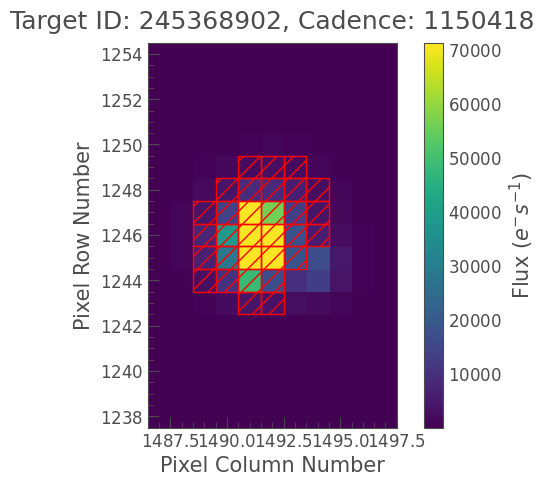

In [ ]:
# Visualize TESS data if available
pixelfile_info_tes.plot(aperture_mask=pixelfile_info_tes.pipeline_mask)
fig = plt.gcf()
fig.set_size_inches(7, 5)
plt.show()

In [ ]:
# Visualize Kepler data if available
pixelfile_info_kep.plot(aperture_mask=pixelfile_info_kep.pipeline_mask, scale='log')
fig = plt.gcf()
fig.set_size_inches(7, 5)
plt.show()

In [ ]:
# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(14,6))
pixelfile_info_kep.plot(ax=axes[0], aperture_mask=pixelfile_info_kep.pipeline_mask, scale='log')
pixelfile_info_tes.plot(ax=axes[1], aperture_mask=pixelfile_info_tes.pipeline_mask)
fig.tight_layout();

In [ ]:
# Visualize how the target star's brightness evolves over time (Animate Exoplanet Movement)
pixelfile.animate()

<Axes: title={'center': 'Visualize HR8799'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

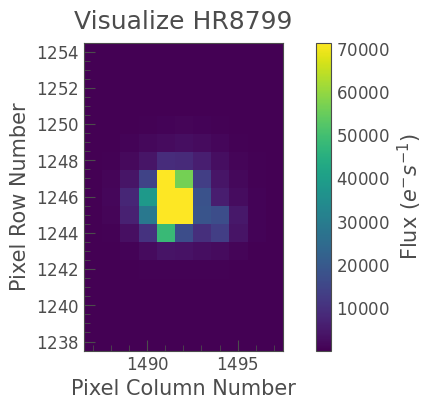

In [ ]:
# Visualize pixelfile data
pixelfile.plot(title=f"Visualize {target}")

In [ ]:
# Pull more info of TPF file
pixelfile.get_header(ext=0)

**Cross Check with Vizier**

In [ ]:
catalog_list = Vizier.find_catalogs('hot jupiter exoplanet transit')
for k, v in catalog_list.items():
    print(k, ":", v.description)

In [ ]:
vizier = Vizier()
result = vizier.query_object("sirius")
print(result)

In [ ]:
# Query an object
interesting_table = result['J/MNRAS/504/5813/tablec4']
print(interesting_table)

In [ ]:
# Query an object
interesting_table = result['IX/8/catalog']
print(interesting_table)

In [ ]:
# Query a region
result = Vizier.query_region("3C 273", radius=Angle(0.1, "deg"), catalog='GSC')
# result = Vizier.query_region("3C 273", radius="0d6m0s", catalog='GSC')
# result = Vizier.query_region("3C 273", radius=0.1*u.deg, catalog='GSC')

print(result)

**Transit fitting, period finding, and light curve analysis**


<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

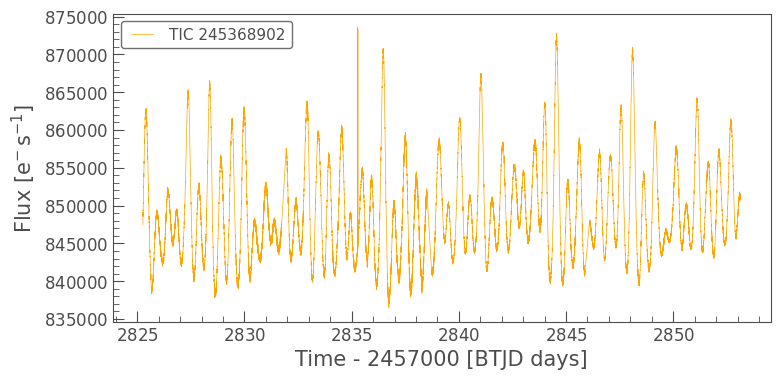

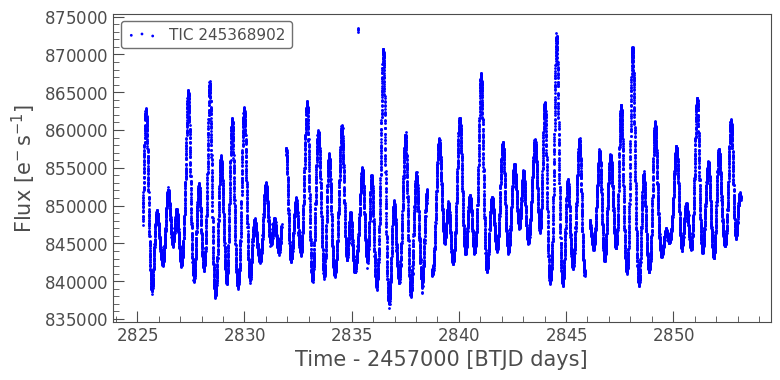

In [ ]:
# Create lightcurve from raw data
pixelfile.to_lightcurve().plot(color='orange')
pixelfile.to_lightcurve().scatter(color='blue')

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

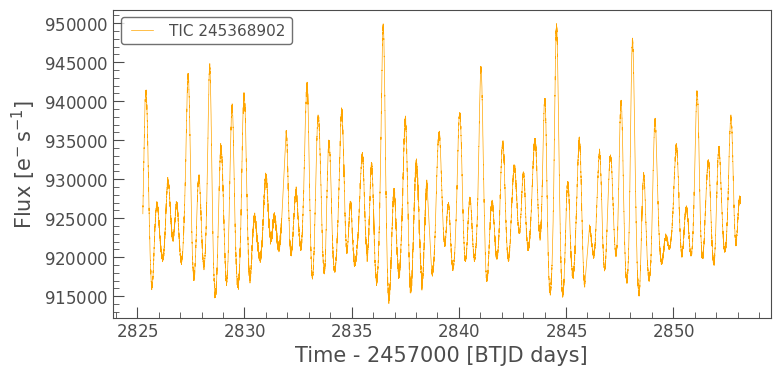

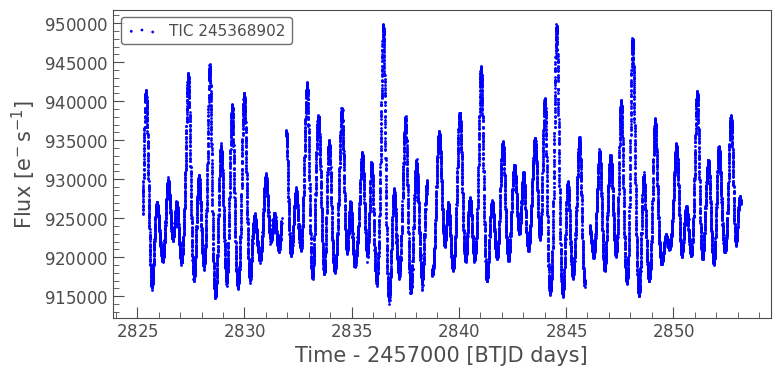

In [ ]:
# Remove noise
pixelfile.to_lightcurve(method="pld").plot(color='orange')
pixelfile.to_lightcurve(method="pld").scatter(color='blue')

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

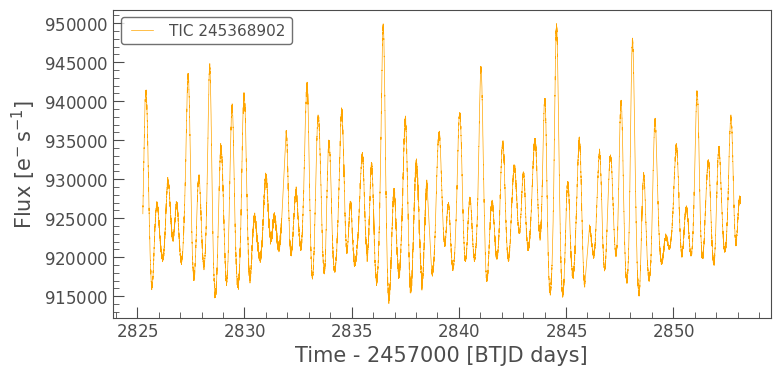

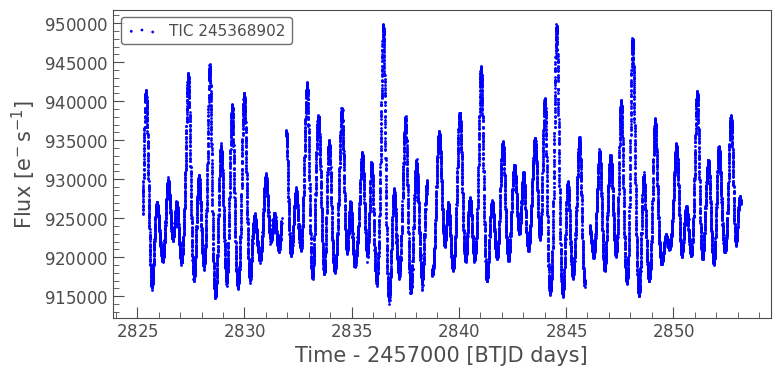

In [ ]:
# Remove outliers
pixelfile.to_lightcurve(method="pld").remove_outliers().plot(color='orange')
pixelfile.to_lightcurve(method="pld").remove_outliers().scatter(color='blue')

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

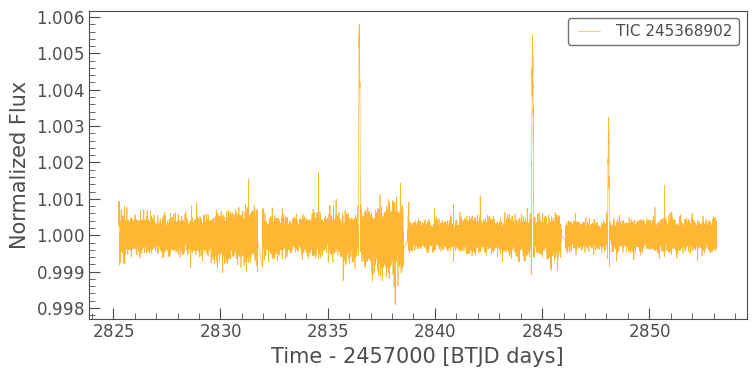

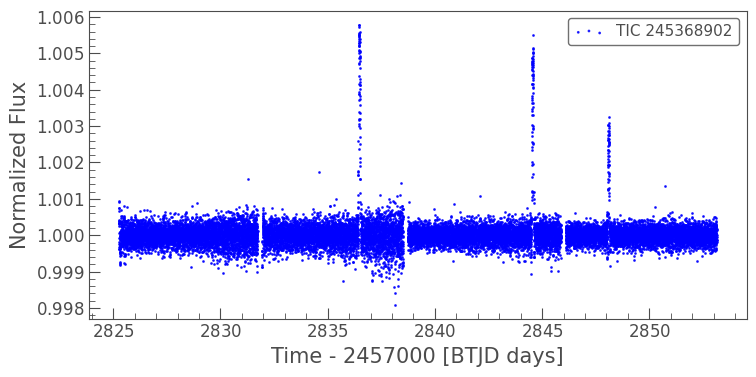

In [ ]:
# Normalize
pixelfile.to_lightcurve(method="pld").remove_outliers().flatten().plot(c='orange', alpha=.8)
pixelfile.to_lightcurve(method="pld").remove_outliers().flatten().scatter(c='b', alpha=.8)

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

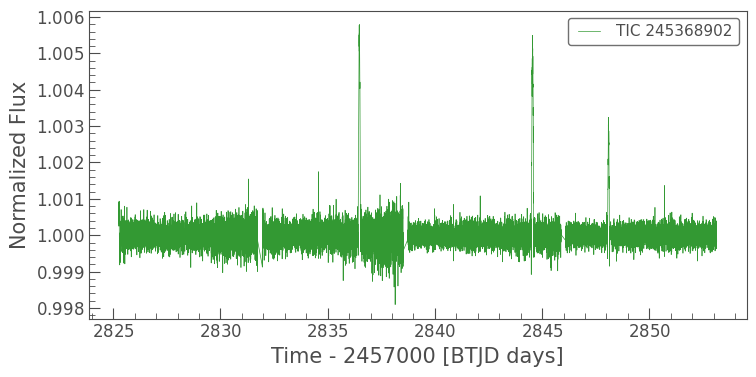

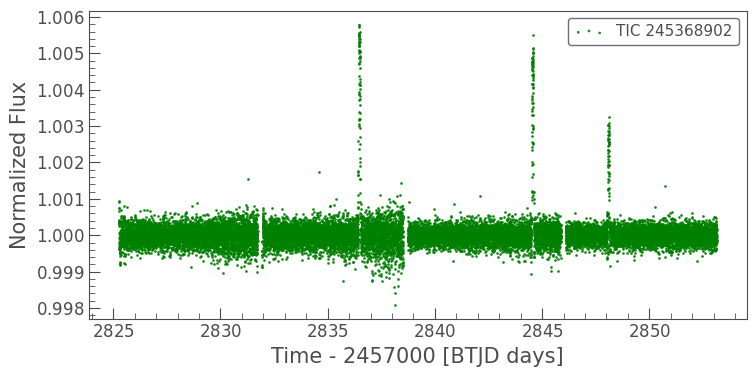

In [ ]:
# Compare with data from TESS (the other data is EPIC which is from K2 | TIC is from TESS)
pixelfile_info_tes.to_lightcurve(method="pld").remove_outliers().flatten().plot(c='green', alpha=.8)
pixelfile_info_tes.to_lightcurve(method="pld").remove_outliers().flatten().scatter(c='green', alpha=.8)

**Create and Analyse Periodogram**

<Axes: title={'center': 'Periodogram - Transit Detection'}, xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

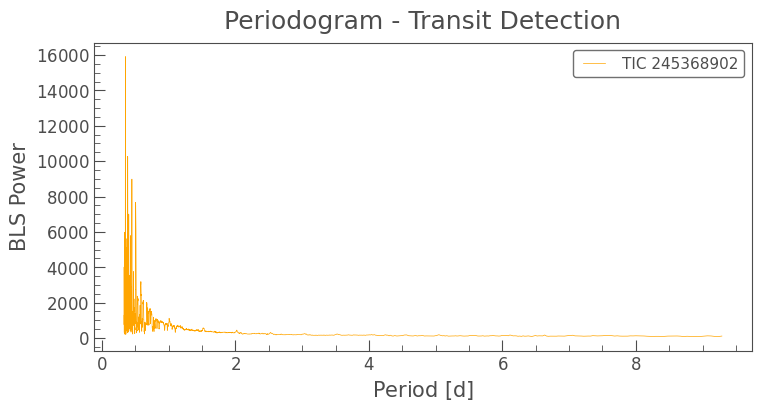

In [ ]:
# Create Periodogram for Transit Detection
periodogram = pixelfile.to_lightcurve(method="pld").remove_outliers().flatten()
periodogram.to_periodogram("bls").plot(title="Periodogram - Transit Detection", color='orange')

Period at max power: 0.35130811557808556 d


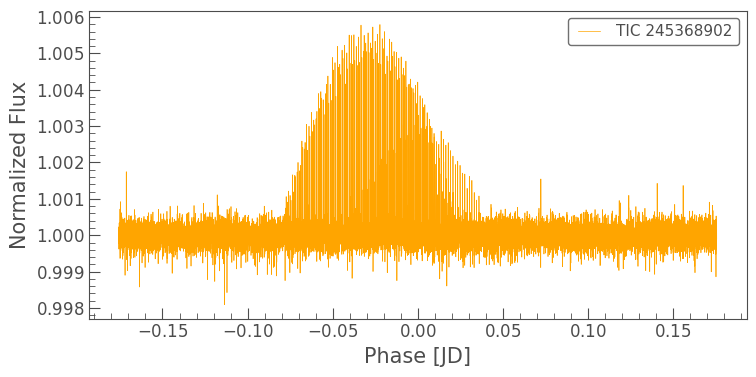

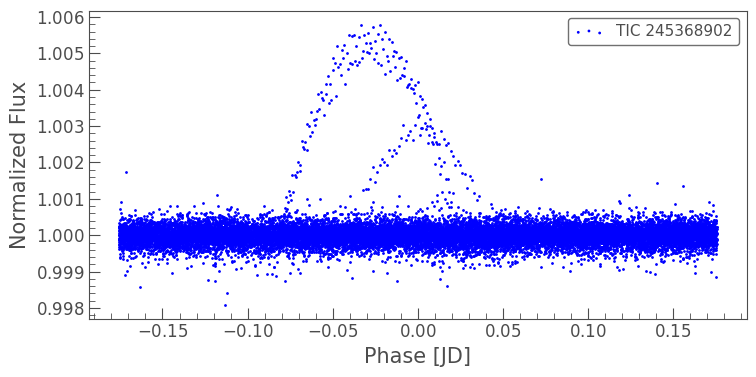

In [ ]:
# Normalize and get period at max power
period = periodogram.to_periodogram("bls").period_at_max_power
periodogram.fold(period).plot(color='orange')
periodogram.fold(period).scatter(color='blue')
print(f"Period at max power: {period}")

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

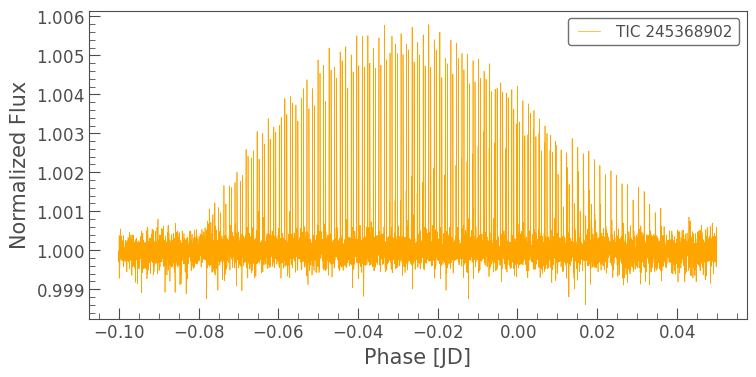

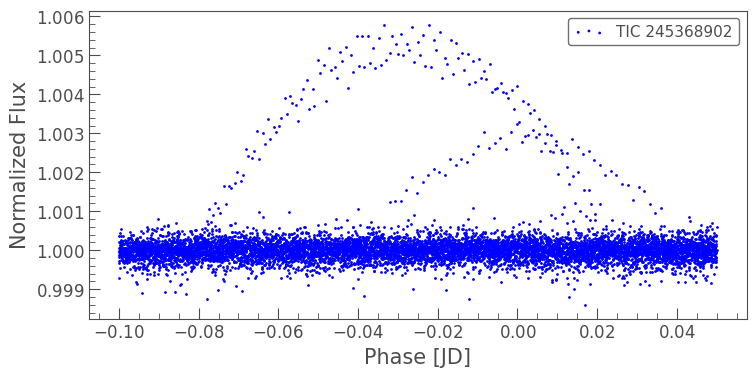

In [ ]:
# Zoom in and focus on dip in lightcurve (at x-axis)
periodogram.fold(period).truncate(-0.1, 0.05).plot(color='orange')
periodogram.fold(period).truncate(-0.1, 0.05).scatter(color='blue')

<Axes: title={'center': 'Periodogram - Transit Detection'}, xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

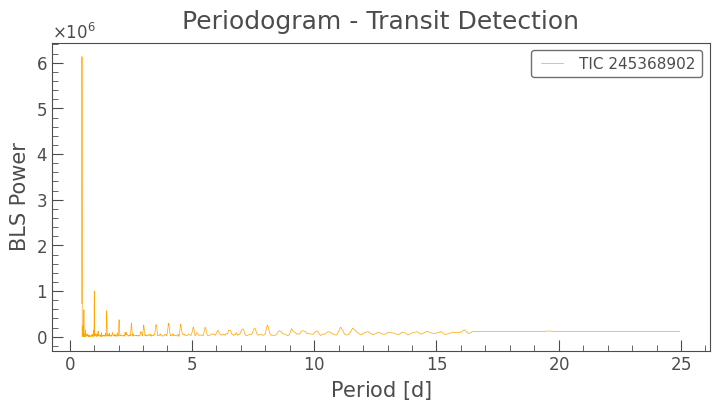

In [ ]:
# Clean the data by removing NaN values and flattening the curve
cleaned_lc = pixelfile.to_lightcurve(method="pld").remove_nans().flatten(window_length=401)

# Detect transits: Use a Box Least Squares (BLS) periodogram to find periodic dips in brightness, which could indicate planetary transits
periodogram = cleaned_lc.to_periodogram(method="bls", minimum_period=0.5, maximum_period=25)

# Plot the BLS periodogram to visualize detected periods (periodogram helps to visualize and extract the best-fit period, i.e. the time between transits
periodogram.plot(title="Periodogram - Transit Detection", color='orange')

In [ ]:
# Get the best-fit transit period and duration
best_fit_period = periodogram.period_at_max_power
best_fit_duration = periodogram.duration_at_max_power
best_fit_depth = periodogram.depth_at_max_power

print(f"Best-fit period: {best_fit_period:.2f} days")
print(f"Best-fit transit duration: {best_fit_duration:.2f} days")
print(f"Transit depth: {best_fit_depth:.6f} relative flux")

Best-fit period: 0.51 d days
Best-fit transit duration: 0.33 d days
Transit depth: 0.003427 relative flux


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

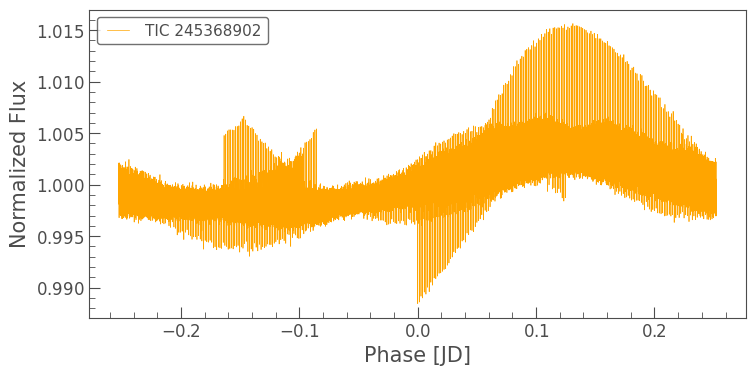

In [ ]:
# Generate "phase-folded light curve" by detected period to observe repeated transits more clearly ("fold" light curve data over a single period)
# This overlays all transit events on top of each other, allowing to clearly see recurring transit in one cycle
folded_lc = cleaned_lc.fold(period=best_fit_period.value)
folded_lc.plot(title=f"Folded Light Curve for {target} - Period: {best_fit_period:.2f} days", color='orange')

In [ ]:
# Estimate the planet radius (using transit depth and star's radius)
# Rp = planet radius, Rs = star radius, depth = fractional dip in brightness
star_radius = 1.065  # Solar radii for Kepler-10
planet_radius = star_radius * np.sqrt(best_fit_depth) # Formula: (Rp/Rs)^2 = depth
print(f"Estimated planet radius: {planet_radius:.2f} solar radii")

Estimated planet radius: 0.06 solar radii
